In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline
import hddm
print(hddm.__version__)

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
data = hddm.load_csv('./rt_dataframes/anxious.csv')
data.head(10)

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,adb5486de57c1af0,2512.0,0.0,102,10.0,0.0,6.0,1.0
1,adb5486de57c1af0,1043.0,0.0,101,16.0,-4.0,0.0,1.0
2,adb5486de57c1af0,1029.0,0.0,101,16.0,-5.0,0.0,1.0
3,adb5486de57c1af0,1093.0,0.0,101,11.0,-4.0,0.0,1.0
4,adb5486de57c1af0,639.0,0.0,101,9.0,-6.0,0.0,1.0
5,adb5486de57c1af0,1107.0,0.0,102,14.0,0.0,3.0,1.0
6,adb5486de57c1af0,955.0,0.0,101,8.0,-2.0,0.0,1.0
7,adb5486de57c1af0,724.0,1.0,101,16.0,-3.0,0.0,1.0
8,adb5486de57c1af0,1970.0,0.0,101,10.0,-10.0,0.0,0.0
9,adb5486de57c1af0,1377.0,1.0,101,16.0,-5.0,0.0,1.0


In [4]:
data = data.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
data.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,adb5486de57c1af0,2512.0,0.0,102,10.0,0.0,6.0,1.0
1,adb5486de57c1af0,1043.0,0.0,101,16.0,-4.0,0.0,1.0
2,adb5486de57c1af0,1029.0,0.0,101,16.0,-5.0,0.0,1.0
3,adb5486de57c1af0,1093.0,0.0,101,11.0,-4.0,0.0,1.0
4,adb5486de57c1af0,639.0,0.0,101,9.0,-6.0,0.0,1.0
5,adb5486de57c1af0,1107.0,0.0,102,14.0,0.0,3.0,1.0
6,adb5486de57c1af0,955.0,0.0,101,8.0,-2.0,0.0,1.0
7,adb5486de57c1af0,724.0,1.0,101,16.0,-3.0,0.0,1.0
8,adb5486de57c1af0,1970.0,0.0,101,10.0,-10.0,0.0,0.0
9,adb5486de57c1af0,1377.0,1.0,101,16.0,-5.0,0.0,1.0


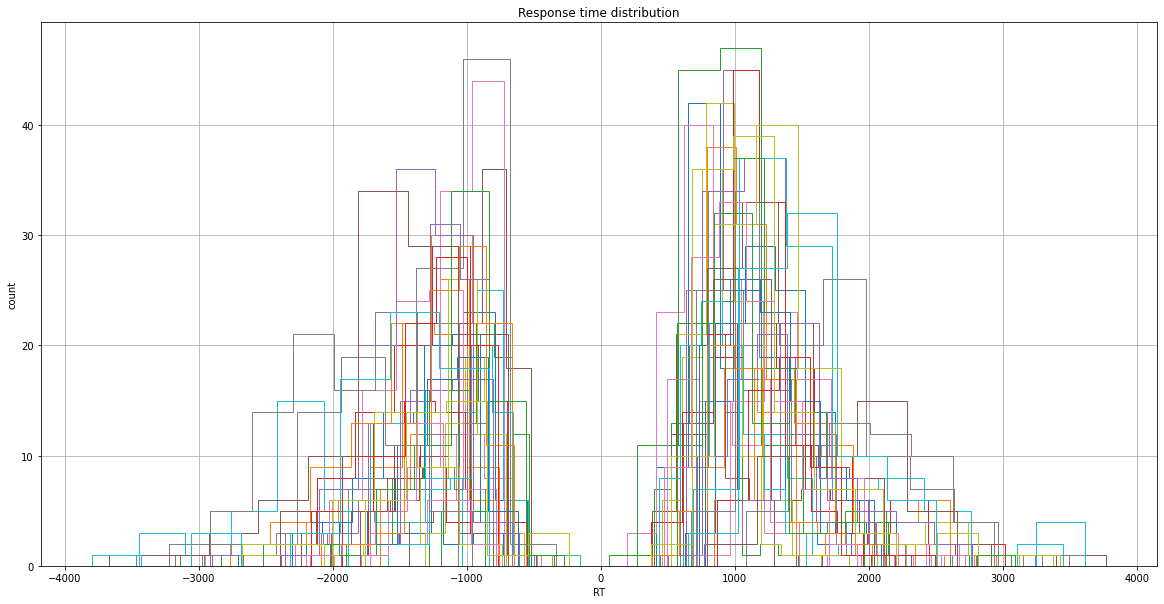

In [5]:
#to flip the error RTs to be negative
data = hddm.utils.flip_errors(data)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('rt_distribution.png')

In [6]:
start_time = time.time()
m = hddm.HDDM(data)
m.find_starting_values()
m.sample(2000, burn=500, dbname='traces.db')
end_time = time.time()
print("MCMC elapsed time:", (end_time - start_time)/60., "minutes")


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/an

 [-----------------100%-----------------] 2001 of 2000 complete in 3755.4 secMCMC elapsed time: 62.66259161631266 minutes


In [19]:
stats = m.gen_stats()
stats[stats.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,0.645332,0.0548477,0.555364,0.594745,0.657971,0.679015,0.770038,0.0141616
a_std,0.414967,0.112607,0.300225,0.34143,0.381876,0.418819,0.65863,0.029075
v,0.246592,0.155277,-0.0729042,0.153579,0.266978,0.364607,0.488785,0.0400924
v_std,0.935738,0.106606,0.765765,0.866238,0.899518,1.02862,1.14072,0.0275256
t,0.29761,0.00821185,0.282269,0.290342,0.297747,0.30565,0.308778,0.00212029
t_std,0.0181427,0.00224943,0.0152323,0.0164917,0.0173297,0.0201974,0.0227427,0.000580801


Plotting a
Plotting a_std
Plotting v
Plotting t


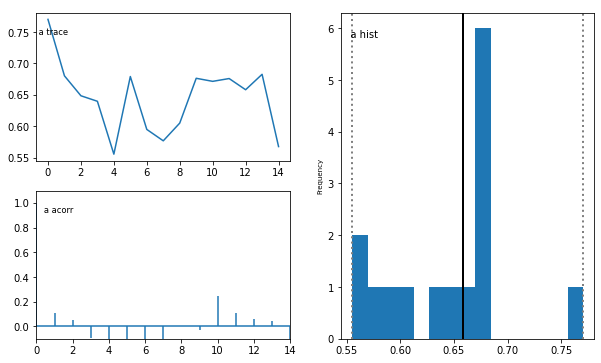

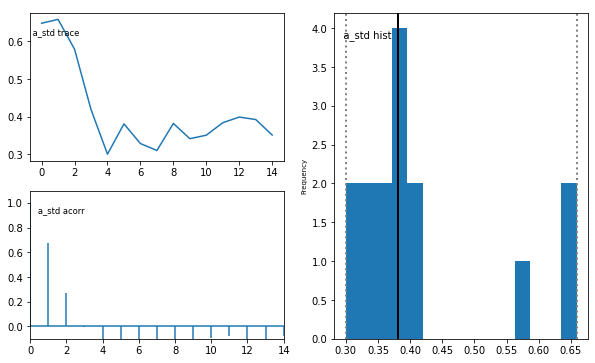

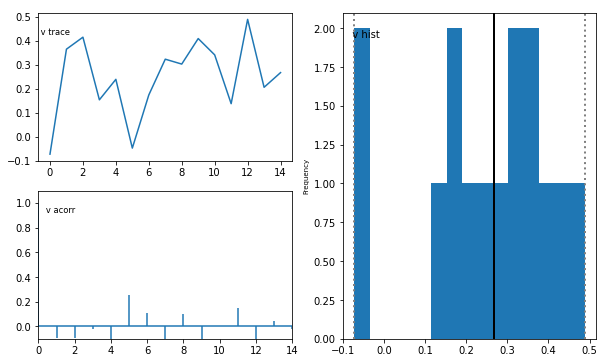

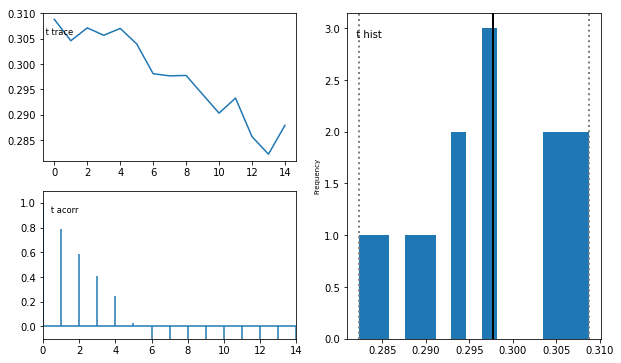

In [20]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])